### Telecom Features

* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* Dependents- (Yes,No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)


In [87]:
# Import EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [27]:
df=pd.read_csv('telecom_users.csv')
df.shape

(5986, 22)

### Expolatory Data Analysis

In [28]:
#dropping unwanted columns
df.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

# Checking Features types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [29]:
# Checking for NA values in dataset
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No missing values found in the dataset. Let's change the `Dtype` of `TotalCharges` to float.**

In [30]:
df['TotalCharges'].astype(str).astype(float)

ValueError: could not convert string to float: ''

### As we can see though there are no empty values in the dataset we have blank (' ') string in total charges column

In [31]:
# Finding empty values
(df['TotalCharges']==' ').sum()

10

In [32]:
# Replacing the values
df['TotalCharges']=df['TotalCharges'].replace(" ",0)

# Converting Dtype
df['TotalCharges']=df['TotalCharges'].astype(str).astype(float)

# Splitting the data set into Churn Yes and No
Churn_yes=df[df['Churn']=='Yes']
Churn_no=df[df['Churn']=='No']


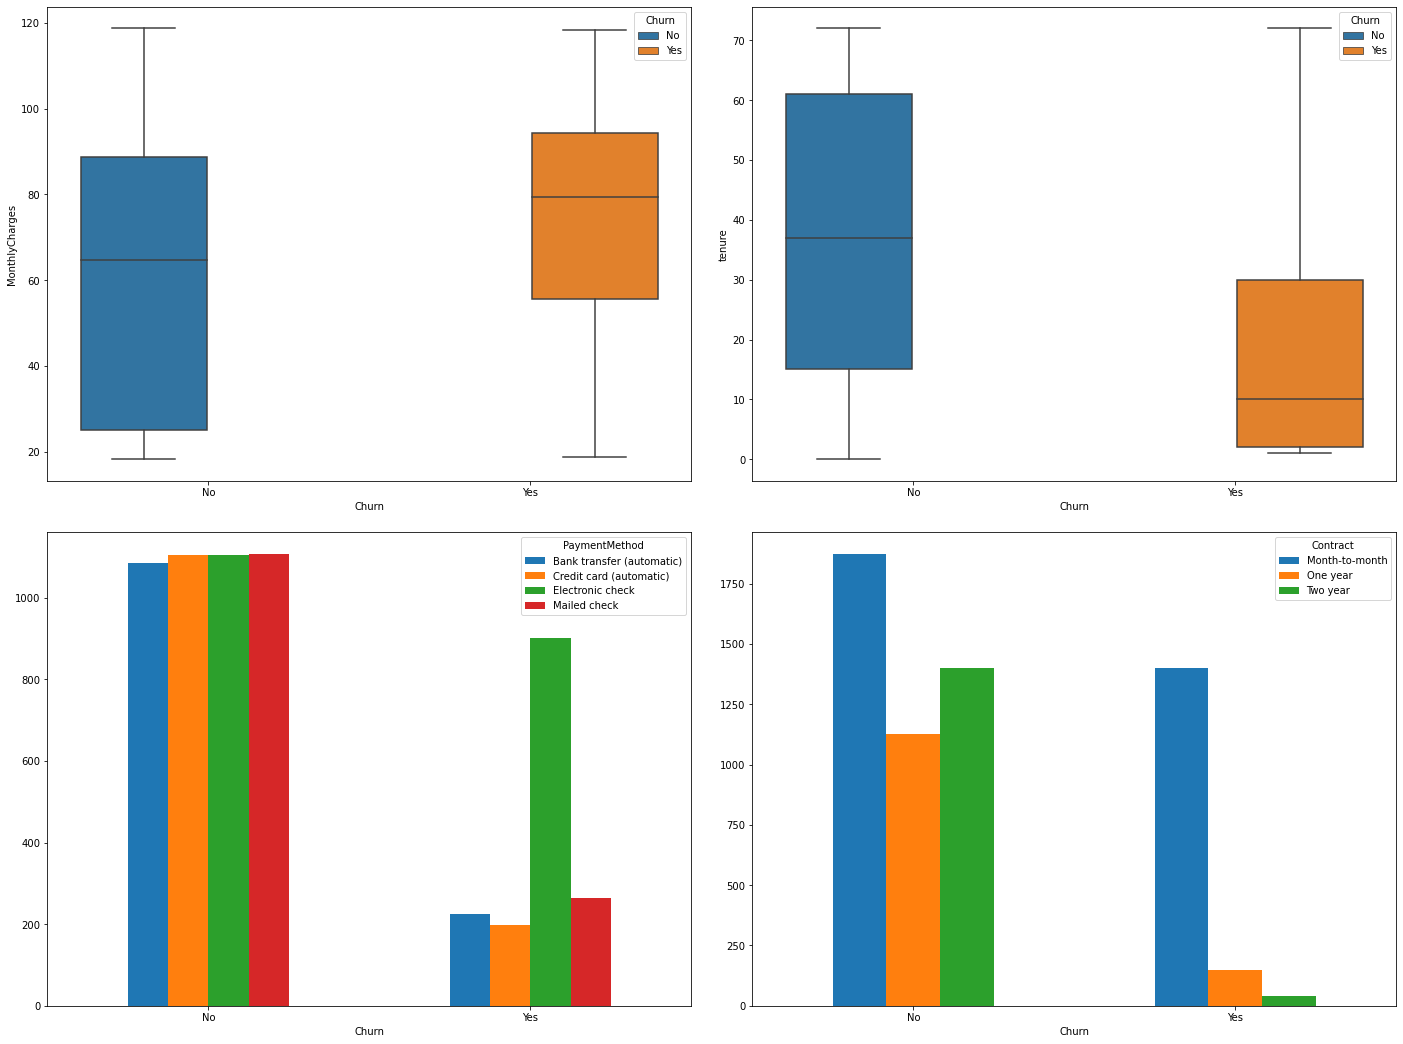

In [33]:
fig,ax=plt.subplots(2,2,figsize=(20, 15))
fig.tight_layout(pad=3)


sns.boxplot(ax=ax[0,0],y='MonthlyCharges',x='Churn',data=df,hue='Churn')
sns.boxplot(ax=ax[0,1],y='tenure',x='Churn',data=df,hue='Churn');

#Churn frequency for diff payment methods
pd.crosstab(df.Churn,df.PaymentMethod).plot(ax=ax[1,0],kind='bar')
# Add some attributes to it
ax[1,0].tick_params(labelrotation=0)

#Churn frequency for diff Contracts types
pd.crosstab(df.Churn,df.Contract).plot(ax=ax[1,1],kind='bar')
# Add some attributes to it
ax[1,1].tick_params(labelrotation=0)

#### Observation

   * Churn rate is more when monthly charges are 60 Currency Units.
   * Higher the tenure the lesser the Churn rate. i.e. as tenure increases the churn rate decreases.
   * For Electronic Check payment methods the churn rate is high.
   * When Contract type is Month to month we have high churn rate compared to others.

#### Analysing Churn frequency with other features

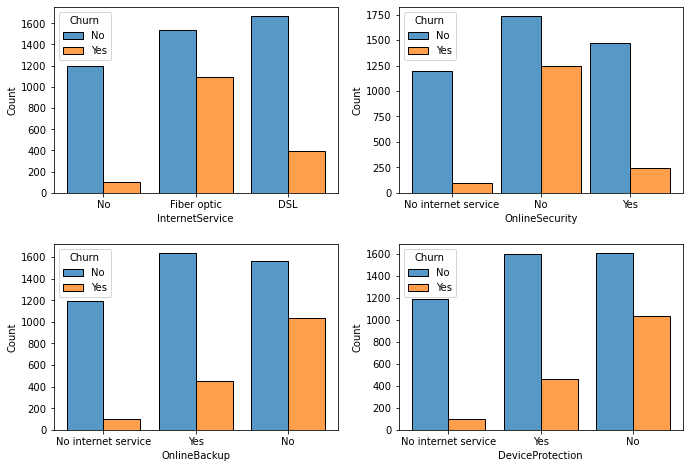

In [34]:
fig,ax=plt.subplots(2,2,figsize=(10, 7))
fig.tight_layout(pad=3)

sns.histplot(ax=ax[0,0],x='InternetService',data=df,hue='Churn', multiple="dodge",shrink=0.8)
sns.histplot(ax=ax[0,1],x='OnlineSecurity',data=df,hue='Churn', multiple="dodge",shrink=0.9)
sns.histplot(ax=ax[1,0],x='OnlineBackup',data=df,hue='Churn', multiple="dodge",shrink=0.8)
sns.histplot(ax=ax[1,1],x='DeviceProtection',data=df,hue='Churn', multiple="dodge",shrink=0.8);

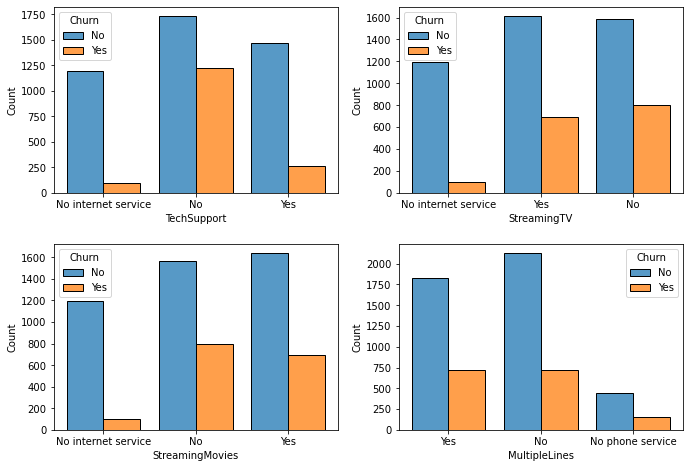

In [35]:
fig,ax=plt.subplots(2,2,figsize=(10, 7))
fig.tight_layout(pad=3)

sns.histplot(ax=ax[0,0],x='TechSupport',data=df,hue='Churn', multiple="dodge",shrink=0.8)
sns.histplot(ax=ax[0,1],x='StreamingTV',data=df,hue='Churn', multiple="dodge",shrink=0.8)
sns.histplot(ax=ax[1,0],x='StreamingMovies',data=df,hue='Churn', multiple="dodge",shrink=0.8)
sns.histplot(ax=ax[1,1],x='MultipleLines',data=df,hue='Churn', multiple="dodge",shrink=0.8);


#### Observation

   * If the internet service is of type fiberoptic there are more number of churn.
   * Similarly when there are no Online security,Online backup,Device protection provided churn frequency is high
   * When there is no proper tech support users tend to churn more.
   * There is no major pattern observed between streamingservices(Streaming Movies or TV)
   * Users with multiple lines exhibit a 50% churn but there is no particular pattern observed.

In [36]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

for i in df[categorical_columns]:
    df[i] = pd.Categorical(df[i]).codes

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


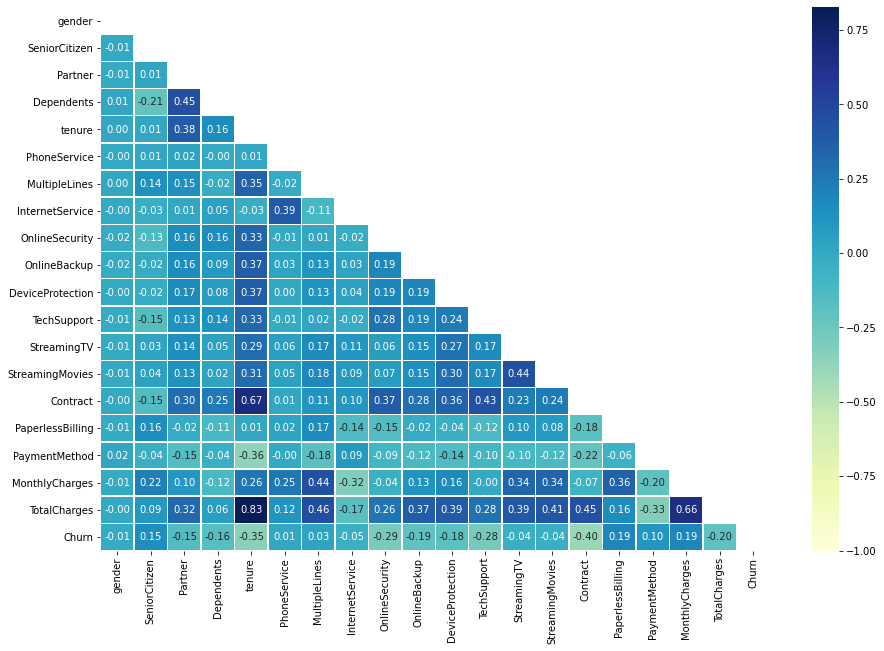

In [37]:
# finding the correaltion between diff features
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1,
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu",mask=mask);

### Modelling

In [38]:
# Splitting the datasets
X=df.drop('Churn',axis=1)

#Target Variable
y=df['Churn']

In [39]:
# Split data into train & test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Model choices

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [40]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

E:\DataAnalysisProjects\Telecom\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7746243739565943,
 'Logistic Regression': 0.8055091819699499,
 'Random Forest': 0.8013355592654424}

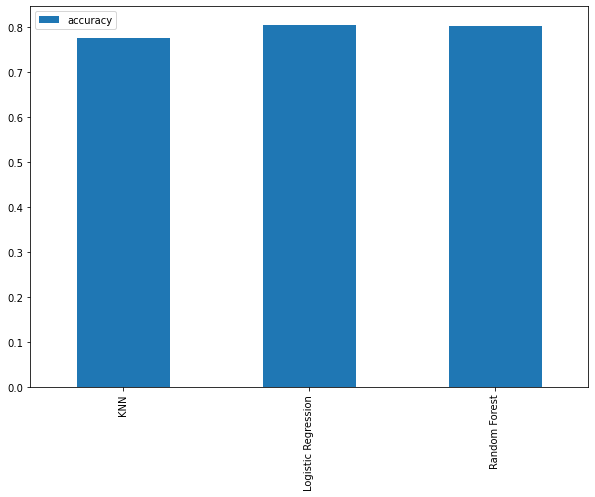

In [42]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,7));

### Hyperparameter Tuning using RandomSearchCV

In [70]:
# Hyperparameter Grid for KNN,Logistic Regression and RandomForest
knn_grid={'n_neighbors':range(1,21),
          'weights':['uniform', 'distance'],
          'leaf_size':range(1,51),
          'p':[1,2]
         }

log_grid = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':np.arange(1,32),
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [71]:
#Tune KNN
knn_reg=RandomizedSearchCV(KNeighborsClassifier(),
                      knn_grid,
                      cv=5,
                      n_iter=10,
                      verbose=True)

knn_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': range(1, 51),
                                        'n_neighbors': range(1, 21),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [72]:
knn_reg.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 50}

In [73]:
knn_reg.score(X_test,y_test)

0.7854757929883138

In [74]:
# Tune Logistic regression
log_reg=RandomizedSearchCV(LogisticRegression(),
                      log_grid,
                      cv=5,
                      n_iter=10,
                      verbose=True)

log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [77]:
log_reg.score(X_test,y_test)

0.8096828046744574

In [80]:
#Tune Random forest
rf_reg=RandomizedSearchCV(RandomForestClassifier(),
                      rf_grid,
                      cv=5,
                      n_iter=10,
                      verbose=True)

rf_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
rf_reg.best_params_

{'n_estimators': 660,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_depth': 18}

In [82]:
rf_reg.score(X_test,y_test)

0.8088480801335559

### Evaluating tuned Models
* ROC and AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

In [94]:
y_preds=log_reg.predict(X_test)
y_preds
y_test

5535    0
1640    0
5411    0
2122    0
909     0
       ..
3178    0
4418    0
2472    1
5387    0
2275    0
Name: Churn, Length: 1198, dtype: int8

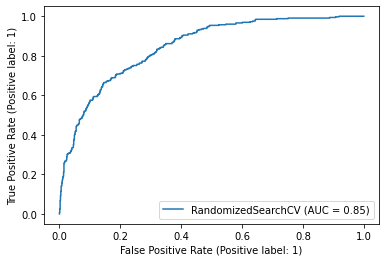

In [89]:
# Plot ROC and Calculate AUC
plot_roc_curve(log_reg,X_test,y_test);

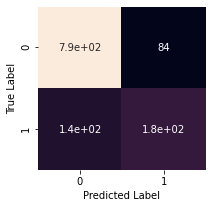

In [91]:
# Confusion Matrix
def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_conf_matrix(y_test,y_preds)
    

#### Classification report without cross validation

In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       873
           1       0.68      0.56      0.61       325

    accuracy                           0.81      1198
   macro avg       0.76      0.73      0.74      1198
weighted avg       0.80      0.81      0.80      1198



#### Classification report with cross validation

In [100]:
#Create a new classifier with best params
clf_rs=LogisticRegression(C=206.913808111479,solver='liblinear')

In [104]:
metrics={'Accuracy':'accuracy',
         'Precision':'precision',
         'Recall':'recall',
         'F1':'f1'}

#function to check metric for each scoring type using CV method
def metrics_cv(metrics,clf,X,y):
    scores={}
    for name,metric in metrics.items():
        cv_score=cross_val_score(clf,X,y,cv=5,scoring=metric)
        #append values to scores
        scores[name]=np.mean(cv_score)
    return scores

metric=metrics_cv(metrics,clf_rs,X,y)

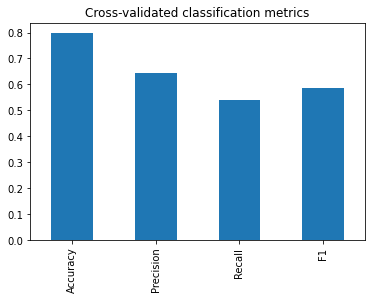

In [106]:
cv_metrics=pd.DataFrame(metric,index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);